In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk # natural language tool kit

In [5]:
data=pd.read_csv('twitter.csv.zip')
data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In dataset, label with values 0 (positive ) and 1 negative

In [6]:
data.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [8]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [9]:
data.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [10]:
data.shape

(31962, 3)

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,31962.0,15981.500000,9226.778988,1.0,7991.25,15981.5,23971.75,31962.0
label,31962.0,0.070146,0.255397,0.0,0.00,0.0,0.00,1.0


In [12]:
data['tweet']

,tweet
0,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation
...,...
31957,ate @user isz that youuu?ðððððð...
31958,to see nina turner on the airwaves trying to...
31959,listening to sad songs on a monday morning otw...
31960,"@user #sikh #temple vandalised in in #calgary,..."


In [13]:
tweets_df=data
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [14]:
# drop id column
tweets_df =tweets_df.drop(['id'],axis=1)
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [15]:
tweets_df.columns

Index(['label', 'tweet'], dtype='object')

label - says positive or negative review

tweet - message

In [16]:
tweets_df['label'].value_counts()

,count
label,
0,29720
1,2242


array([[<Axes: title={'center': 'label'}>]], dtype=object)

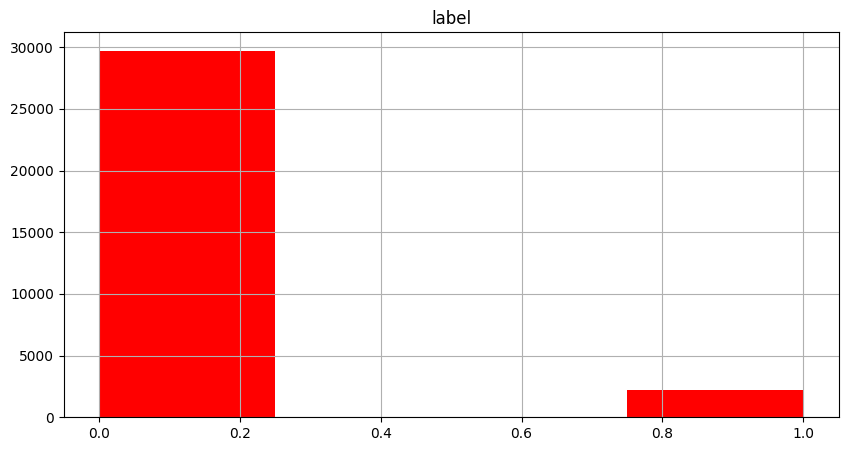

In [24]:
tweets_df.hist(bins=4,figsize=(10,5),color='r')


In [25]:
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [26]:
tweets_df['length']=tweets_df['tweet'].apply(len)

In [27]:
tweets_df.columns

Index(['label', 'tweet', 'length'], dtype='object')

In [28]:
tweets_df.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


In [29]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


min length 11

max length 274

mean 84

In [33]:
# lets check shortest message
tweets_df[tweets_df['length']==11]

,label,tweet,length
25195,0,i love you,11


In [34]:
tweets_df[tweets_df['length']==11]['tweet'].iloc[0]

'i love you '

In [35]:
# message with maximum length
tweets_df[tweets_df['length']==274]['tweet'].iloc[0]

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82â\x80¦'

In [36]:
tweets_df[tweets_df['length']==84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [37]:
positive= tweets_df[tweets_df['label']==0]
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [38]:
negative= tweets_df[tweets_df['label']==1]
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


imbalanced - minority class should be less than 5%

classes - positive , negative

preprocessing

deal with punctuations

In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

dealing with stopwords

In [41]:
from nltk.corpus import stopwords

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [43]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

count vectorization

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
sample=['This is the first session','this is second session']
# v=CountVectorizer()
v=CountVectorizer(lowercase=False) # True
x=v.fit_transform(sample)
x=x.toarray()
df=pd.DataFrame(data=x,columns=v.get_feature_names_out() )
print(df)

   This  first  is  second  session  the  this
0     1      1   1       0        1    1     0
1     0      0   1       1        1    0     1


punctuation, stopwords, tokenize, vectorization

In [53]:
def cleaning(message):
  test_punc_removed=[char for char in message if char not in string.punctuation]
  test_punc_removed_join=''.join(test_punc_removed)

  test_punc_removed_join_clean=[word for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
  return test_punc_removed_join_clean

In [54]:
tweets_df_clean =tweets_df['tweet'].apply(cleaning)
tweets_df_clean

,tweet
0,"[user, father, dysfunctional, selfish, drags, ..."
1,"[user, user, thanks, lyft, credit, cant, use, ..."
2,"[bihday, majesty]"
3,"[model, love, u, take, u, time, urð±, ðð..."
4,"[factsguide, society, motivation]"
...,...
31957,"[ate, user, isz, youuuðððððð..."
31958,"[see, nina, turner, airwaves, trying, wrap, ma..."
31959,"[listening, sad, songs, monday, morning, otw, ..."
31960,"[user, sikh, temple, vandalised, calgary, wso,..."


In [55]:
tweets_df_clean.head()

,tweet
0,"[user, father, dysfunctional, selfish, drags, ..."
1,"[user, user, thanks, lyft, credit, cant, use, ..."
2,"[bihday, majesty]"
3,"[model, love, u, take, u, time, urð±, ðð..."
4,"[factsguide, society, motivation]"


In [56]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
 # original text before text preprocessing
tweets_df['tweet'][0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [59]:
 # original text after text preprocessing
tweets_df_clean[0]

['user',
 'father',
 'dysfunctional',
 'selfish',
 'drags',
 'kids',
 'dysfunction',
 'run']

In [61]:
tweets_df_clean

,tweet
0,"[user, father, dysfunctional, selfish, drags, ..."
1,"[user, user, thanks, lyft, credit, cant, use, ..."
2,"[bihday, majesty]"
3,"[model, love, u, take, u, time, urð±, ðð..."
4,"[factsguide, society, motivation]"
...,...
31957,"[ate, user, isz, youuuðððððð..."
31958,"[see, nina, turner, airwaves, trying, wrap, ma..."
31959,"[listening, sad, songs, monday, morning, otw, ..."
31960,"[user, sikh, temple, vandalised, calgary, wso,..."


In [62]:
# count vectorizing
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(analyzer=cleaning,dtype=np.uint8)
tweets_countvectorizer=vectorizer.fit_transform(tweets_df['tweet'])
print(tweets_countvectorizer.toarray())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [63]:
tweets_countvectorizer.shape

(31962, 47386)

In [64]:
tweets=pd.DataFrame(tweets_countvectorizer.toarray())


In [65]:
x=tweets
x

,0,1,2,3,4,5,6,7,8,9,...,47376,47377,47378,47379,47380,47381,47382,47383,47384,47385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
y=tweets_df['label']
y

,label
0,0
1,0
2,0
3,0
4,0
...,...
31957,0
31958,0
31959,0
31960,1


classification ml - naive bayes

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [69]:
from sklearn.naive_bayes import MultinomialNB


In [ ]:
nbc=MultinomialNB()
nbc.fit(xtrain,ytrain)

In [ ]:
ypred=nbc.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(ytest,ypred)